<a href="https://colab.research.google.com/github/KTB2110/PortfolioProjects/blob/Projects/SentimentAnalysisFINVIZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to Sentiment Analysis of Stocks powered by FINVIZ**

**This program enables you to obtain information on the sentiment of your desired stock listing/Company over the last few days based on recent articles published pertaining to the Company.**

### Please run the code chunks below!

In [86]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from plotnine import *
import pandas as pd
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [87]:
df = pd.read_csv("stocks.csv")
df = df[['Symbol', 'Name']]

df['Symbol'] = df['Symbol'].str.upper()
df['Name'] = df['Name'].str.upper()
# stock_dict = df.set_index('Symbol').T.to_dict()
stock_dict = pd.Series(df.Symbol.values,index=df.Name).to_dict()
reverse_dict = pd.Series(df.Name.values,index=df.Symbol).to_dict()

### Run this code block below and provide input!


In [88]:
tickers = []
search_results = []
while True:
  print("Welcome to Stock Sentiment Analysis Powered by FINVIZ")
  print("Please enter the stocks you want to analyze one-by-one when prompted.\nType 'Default' if you want to see how we work with a sample list of stock listings!\nType 'Done' when you are done entering your desired stock listings!")

  search = input("Enter desired stock name or company name:\n")
  search = search.upper()
  
  while((search != 'DONE') and (search != 'DEFAULT')):
    
    score = 0
    for value in stock_dict.values():
      if search == value:
        tickers.append(value)
        score = 1
        break

    for key in stock_dict.keys():
      if search in key:
        tickers.append(stock_dict[key])
        score = 1
        break

    if (score == 0):
      print("There seems to be an error in what you have entered.\nPlease check for correct Stock Name or Company Name and Try Again!")

    search = input("Enter desired stock name or company name:\n")
    search = search.upper()
  
  if (search == 'DEFAULT'):
    tickers = ['AMZN', "GOOG", "FB"]
    print("Thank you. \nAnalyzing...")
    break
  elif (search == 'DONE'):
    print("Thank you. \nAnalyzing...")
    break


Welcome to Stock Sentiment Analysis Powered by FINVIZ
Please enter the stocks you want to analyze one-by-one when prompted.
Type 'Default' if you want to see how we work with a sample list of stock listings!
Type 'Done' when you are done entering your desired stock listings!
Enter desired stock name or company name:
MSFT
Enter desired stock name or company name:
AMZN
Enter desired stock name or company name:
NIKE
Enter desired stock name or company name:
done
Thank you. 
Analyzing...


## RUN ALL THE REMAINING CODE BLOCKS

In [89]:
print(tickers)
finviz_url = 'https://finviz.com/quote.ashx?t='
# tickers = ['AMZN', "GOOG", "FB"]

news_tables = {}

['MSFT', 'AMZN', 'NKE']


In [90]:
for ticker in tickers:
  url = finviz_url + ticker

  req = Request(url = url, headers = {'user-agent' : 'my-app'})
  response = urlopen(req)
  
  html = BeautifulSoup(response, 'html')
  news_table = html.find(id = 'news-table')
  news_tables[ticker] = news_table

In [91]:
parsed_data = []

In [92]:
for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    title = row.a.text
    date_data = row.td.text.split(' ')

    if len(date_data) == 1:
      time = date_data[0]
    else :
      time = date_data[1]
      date = date_data[0]

    parsed_data.append([ticker, date, time, title])

print(parsed_data)

[['MSFT', 'Feb-10-22', '03:46PM\xa0\xa0', 'Ken Fisher Sold These 10 Stocks Before Entering 2022'], ['MSFT', 'Feb-10-22', '03:29PM\xa0\xa0', 'Morgan Stanley Pounds the Table on Microsoft Stock'], ['MSFT', 'Feb-10-22', '02:43PM\xa0\xa0', 'If your job doesnt give you purposeful work, you owe it to yourself to join the Great Reshuffle'], ['MSFT', 'Feb-10-22', '02:12PM\xa0\xa0', "Stocks' Decline Steepens on Bullard Rate Comments, Inflation Data"], ['MSFT', 'Feb-10-22', '01:17PM\xa0\xa0', 'Market check: Stocks mixed after inflation print, Fed rate hike uncertainty'], ['MSFT', 'Feb-10-22', '12:56PM\xa0\xa0', 'Twilio and Datadog Are Reminder of Softwares Growth Bona Fides'], ['MSFT', 'Feb-10-22', '11:17AM\xa0\xa0', 'Market check: Stocks choppy as investors digest hot inflation'], ['MSFT', 'Feb-10-22', '10:40AM\xa0\xa0', 'Inflation Hits 7.5%, 40-Year High, Pushing Stocks Lower'], ['MSFT', 'Feb-10-22', '10:00AM\xa0\xa0', 'Is Roblox Stock A Buy Right Now After Hitting All-Time Lows?'], ['MSFT', '

In [93]:
df = pd.DataFrame(parsed_data, columns = ['Ticker', 'Date', "Time", "Title"])

vader = SentimentIntensityAnalyzer()
df['compound'] = df['Title'].apply(lambda title: vader.polarity_scores(title)['compound'])
df

,Ticker,Date,Time,Title,compound
0,MSFT,Feb-10-22,03:46PM,Ken Fisher Sold These 10 Stocks Before Enterin...,0.0000
1,MSFT,Feb-10-22,03:29PM,Morgan Stanley Pounds the Table on Microsoft S...,0.0000
2,MSFT,Feb-10-22,02:43PM,"If your job doesnt give you purposeful work, y...",0.7430
3,MSFT,Feb-10-22,02:12PM,Stocks' Decline Steepens on Bullard Rate Comme...,0.0000
4,MSFT,Feb-10-22,01:17PM,Market check: Stocks mixed after inflation pri...,-0.3400
...,...,...,...,...,...
295,NKE,Jan-27-22,11:27AM,Nike Is Hiring for The Metaverse With Five Key...,0.0000
296,NKE,Jan-27-22,10:23AM,"Market check: Stocks rise in early trading, Te...",0.2960
297,NKE,Jan-27-22,09:38AM,Seatown Holdings Pte. Ltd. Buys Amazon.com Inc...,0.0000
298,NKE,Jan-26-22,08:01PM,Nike promotes internal exec to top legal posit...,0.4767


In [95]:
df['Date'] = pd.to_datetime(df.Date).dt.date

<Figure size 1440x216 with 0 Axes>

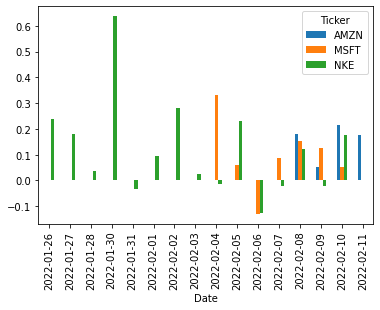

In [97]:
plt.figure(figsize=(20,3))
mean_df = df.groupby(['Ticker', 'Date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis = 'columns').transpose()
mean_df.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()